# **Week 1(7/20-7/26)**  

Completed tasks: (11 hours)  
1 Read two papers, understand the mechanism, and create summaries for each paper, including details about the training, validation, and approach utilized. (6 hours)  
1.1 Representation learning of resting state fMRI with variational autoencoder   
1.2 Automatic Discovery and Generation of Visual Design Characteristics: Application to Visual Conjoint   

2 Download all files and datasets associated with the replication of the Kim et al. paper.    
3 Browse our dataset in Discovery at brainvae/data. (0.5 hours)   
4 Report the summary statistics of each covariate using Jupyter Notebook, based on the variables provided in the `variables.xlsx` file. And explore and identify any meaningful relationships between the variables.  (4.5 hours)    


Questions and plans:    
1 Do the keys in "TimeData_aal_116.pkl" and "ID" in "AOMIC_Political.sav" have the same meaning?  Because they have different length, do we  just use the intersection of them (853 out of 965)?     
2 Some variables have too many "NA". When we conduct chi-square independence test, may I ignore those variables? 



# report details

1.1 Representation learning of resting state fMRI with variational autoencoder  
1.1.1 Use VAE to learn latent variables to represent critical activity and connectivity.   
1.1.2 Transform rsfMRI data into 2_D grids data with FreeSurfer algorithm.     
1.1.3 The correlation between latent variables can be a fingerprint to identify an individual subject.     
1.1.4 authors use VAE with an encoder and decoder as the architecture. Training loss is from beta-VAE. They use β=9 and initial lr=10-4. For the downstream application (Individual identification ), they use top 1,5 10, accuracy to evaluate the model.   

1.2 Automatic Discovery and Generation of Visual Design Characteristics: Application to Visual Conjoint   
1.2.1 Authors use unspervised method and supervised method to disentangle images into latent variables which reprensents visual charateristic. They find that supervised method perform better.   
1.2.2 unsupervised method is achieved by beta-tcVAE. And supervised method (Supervised Variational Autoencoder with Disentanglement Losses) is achieved by beta-tcVAE and a classifier. The classifer is trained with beta-tcVAE together. The classifier is supervised by structured product characteristics, such as brand and price.   
1.2.3 The classifer is implemented by a MLP. And its loss is cross-entropy or MSE.   
1.2.4 (model evaluation)Authors use Unsupervised Disentanglement Ranking (UDR) to evaluate models.   
1.2.5 (model selection)When finetuning hypeparameters, for supervised method, they use loss of supervised part. For unsupervised method, they use UDR   
1.2.6 For different task, we need to find the best hyperparameters for los terms weights (α, β, γ, δ). Also we need to find the best combination of supervised signals (structured product characteristics)   
1.2.7 Authors use 20 as the number of latent variables.   



**4.1Report the summary statistics of each covariate**  



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
import numpy as np
from scipy.stats import chi2_contingency
import textwrap

In [3]:
sub_attr = pd.read_spss(r"C:\Users\Administrator\Desktop\vae\AOMIC_Political.sav")
sub_attr.head()

,ID1000ID,Anam1.2,Anam1.4,Anam1.8,Anam1.8_v,anam1.8b,Anam1.26,SA1.1,SA1.2,SA1.3,...,sa1.38b,sa1.38c,SA1.39,SA1.40,SA1.40_TEXT,SA1.40_v,SA1.40_v_TEXT,SA1.41,SA1.41_TEXT,SA1.41_v
0,001,Vrouw,Rechtshandig,"havo of vwo (hbs, atheneum, gymnasium)",NaN,NaN,Modaal tot dubbel-modaal (32500-65000 euro in ...,tegen,voor,tegen,...,NaN,NaN,Ja,GroenLinks,,NaN,,GroenLinks,,NaN
1,002,Vrouw,Rechtshandig,universiteit of post-hbo onderwijs,NaN,NaN,Modaal tot dubbel-modaal (32500-65000 euro in ...,"niet voor, niet tegen","niet voor, niet tegen","niet voor, niet tegen",...,NaN,NaN,Ja,GroenLinks,,NaN,,D66,,NaN
2,003,Vrouw,Rechtshandig,"havo of vwo (hbs, atheneum, gymnasium)",NaN,NaN,Modaal tot dubbel-modaal (32500-65000 euro in ...,voor,voor,tegen,...,NaN,NaN,Ja,GroenLinks,,NaN,,GroenLinks,,NaN
3,004,Man,Rechtshandig,"havo of vwo (hbs, atheneum, gymnasium)",NaN,NaN,Dubbel-modaal tot driemaal-modaal (65000-10000...,tegen,voor,tegen,...,NaN,NaN,Ja,D66,,NaN,,D66,,NaN
4,005,Vrouw,Rechtshandig,hbo (hoger beroepsonderwijs),NaN,NaN,Dubbel-modaal tot driemaal-modaal (65000-10000...,"niet voor, niet tegen","niet voor, niet tegen","niet voor, niet tegen",...,NaN,NaN,Ja,VVD,,NaN,,VVD,,NaN


In [4]:
print(f"the shape of AOMIC_Political is {sub_attr.shape}")

the shape of AOMIC_Political is (965, 54)


In [5]:
roi = pd.read_pickle(r"C:\Users\Administrator\Desktop\vae\TimeData_aal_116.pkl")
roi[1]

array([[-0.24875477, -0.1298629 , -0.07714333, ..., -0.17451972,
        -0.15372719, -0.21632306],
       [-1.4025472 ,  0.9645183 , -2.0540524 , ..., -0.32459703,
         0.4659242 ,  0.13810827],
       [-1.8430977 ,  1.8178966 , -3.3597832 , ..., -0.2555975 ,
         1.0542192 ,  0.62525797],
       ...,
       [ 2.4559999 ,  1.5080688 ,  1.4888821 , ...,  0.9946466 ,
         0.893554  ,  1.817088  ],
       [ 1.6494625 ,  0.86864537,  0.85198855, ...,  0.5533775 ,
         0.44555292,  1.308293  ],
       [ 0.22412688,  0.09873179,  0.20297816, ...,  0.23020177,
         0.15316793,  0.49973106]], dtype=float32)

In [6]:
#only EDA intersection part 
ids_roi = list(roi.keys())
sub_attr['ID1000ID'] = sub_attr['ID1000ID'].astype('int')
sub_attr_new = sub_attr[sub_attr['ID1000ID'].isin(ids_roi)]  
sub_attr_new = sub_attr_new.drop(columns=['ID1000ID'])

In [7]:
#check na count
#but we find that there are lots of "" values. So we need to check further
sub_attr_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 0 to 899
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Anam1.2        853 non-null    category
 1   Anam1.4        853 non-null    category
 2   Anam1.8        329 non-null    category
 3   Anam1.8_v      524 non-null    category
 4   anam1.8b       472 non-null    category
 5   Anam1.26       852 non-null    category
 6   SA1.1          852 non-null    category
 7   SA1.2          852 non-null    category
 8   SA1.3          852 non-null    category
 9   SA1.4          852 non-null    category
 10  SA1.5          852 non-null    category
 11  SA1.6          852 non-null    category
 12  SA1.7          852 non-null    category
 13  SA1.8          852 non-null    category
 14  SA1.9          852 non-null    category
 15  SA1.10         852 non-null    category
 16  SA1.11         852 non-null    category
 17  SA1.12         852 non-null    cate

In [8]:
#print counts for each value of the variables
for col in list(sub_attr_new):
    print('Variable:', col)
    print(sub_attr_new[col].value_counts(dropna=False).to_string())
    print("----------------------------------------------------")

Variable: Anam1.2
Vrouw    434
Man      419
----------------------------------------------------
Variable: Anam1.4
Rechtshandig    763
Linkshandig      90
----------------------------------------------------
Variable: Anam1.8
NaN                                                              524
mbo (middelbaar beroepsonderwijs)                                129
havo of vwo (hbs, atheneum, gymnasium)                           100
 hbo (hoger beroepsonderwijs)                                     25
mavo, vmbo (theoretische leerweg)                                 25
universiteit of post-hbo onderwijs                                24
vmbo (basisvorming, leerweg aansluitend bij beroepsonderwijs)     18
lagere school, basisschool                                         8
----------------------------------------------------
Variable: Anam1.8_v
NaN                                                                                          329
vwo (atheneum, gymnasium)                           

**There are 53 variables in "AOMIC_Political.sav".**    
**26 of 53 variables have 'NA' values over 50%** :   
Anam1.8, SA1.14, SA1.17, SA1.18, SA1.19, SA1.21, SA1.22, SA1.23, SA1.24, SA1.25, SA1.27, SA1.28, SA1.29, SA1.30, SA1.31, SA1.32, SA1.33, SA1.34, SA1.35, SA1.36, SA1.37, SA1.40_TEXT, SA1.40_v, SA1.40_v_TEXT, SA1.41_TEXT, SA1.41_v  

**8 variables have 'NA' values between 30% and 50%** :   
Anam1.8_v, anam1.8b, SA1.16, SA1.20, SA1.26, sa1.38en, sa1.38b, sa1.38c   

**1 variable has 104 'NA': SA1.41 (104)**

**Only 18 variables have comparibly complete data.**

**We output the counts for each value of the variables above.**

In [9]:
list(sub_attr_new.columns)

['Anam1.2',
 'Anam1.4',
 'Anam1.8',
 'Anam1.8_v',
 'anam1.8b',
 'Anam1.26',
 'SA1.1',
 'SA1.2',
 'SA1.3',
 'SA1.4',
 'SA1.5',
 'SA1.6',
 'SA1.7',
 'SA1.8',
 'SA1.9',
 'SA1.10',
 'SA1.11',
 'SA1.12',
 'SA1.14',
 'SA1.16',
 'SA1.17',
 'SA1.18',
 'SA1.19',
 'SA1.20',
 'SA1.21',
 'SA1.22',
 'SA1.23',
 'SA1.24',
 'SA1.25',
 'SA1.26',
 'SA1.27',
 'SA1.28',
 'SA1.29',
 'SA1.30',
 'SA1.31',
 'SA1.32',
 'SA1.33',
 'SA1.34',
 'SA1.35',
 'SA1.36',
 'SA1.37',
 'SA1.38',
 'sa1.38en',
 'sa1.38b',
 'sa1.38c',
 'SA1.39',
 'SA1.40',
 'SA1.40_TEXT',
 'SA1.40_v',
 'SA1.40_v_TEXT',
 'SA1.41',
 'SA1.41_TEXT',
 'SA1.41_v']

In [24]:
# check the distribution. All variables of our dataset are categorical variables. So we need barplot to check the distribution.
def plot_count(df, label_len=10):
    lables = list(df.columns)
    fig, axs = plt.subplots(ncols=5, figsize=(15, 6))
    f = lambda x: x.get_text()[:12]
    a = sns.countplot(x=lables[0], data=sub_attr_new, ax=axs[0])
    a.set_xticklabels(map(f,a.get_xticklabels()), rotation=90, fontsize=8)
    if len(lables)==1:
        return
    b = sns.countplot(x=lables[1], data=sub_attr_new, ax=axs[1])
    b.set_xticklabels(map(f,b.get_xticklabels()), rotation=90, fontsize=8)
    if len(lables)==2:
        return
    c = sns.countplot(x=lables[2], data=sub_attr_new, ax=axs[2])
    c.set_xticklabels(map(f,c.get_xticklabels()), rotation=90, fontsize=8)
    if len(lables)==3:
        return
    d = sns.countplot(x=lables[3], data=sub_attr_new, ax=axs[3])
    d.set_xticklabels(map(f,d.get_xticklabels()), rotation=90, fontsize=8)
    if len(lables)==4:
        return
    e = sns.countplot(x=lables[4], data=sub_attr_new, ax=axs[4])
    e.set_xticklabels(map(f,e.get_xticklabels()), rotation=90, fontsize=8)

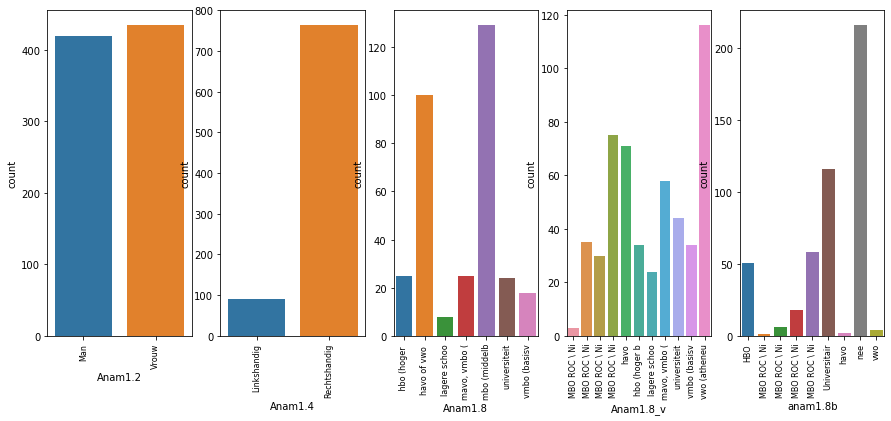

In [11]:
plot_count(sub_attr_new.iloc[:,:5])

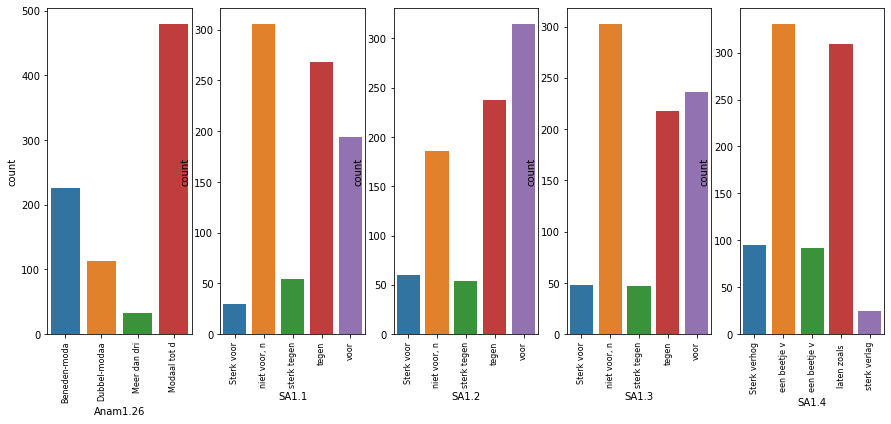

In [12]:
plot_count(sub_attr_new.iloc[:,5:10])

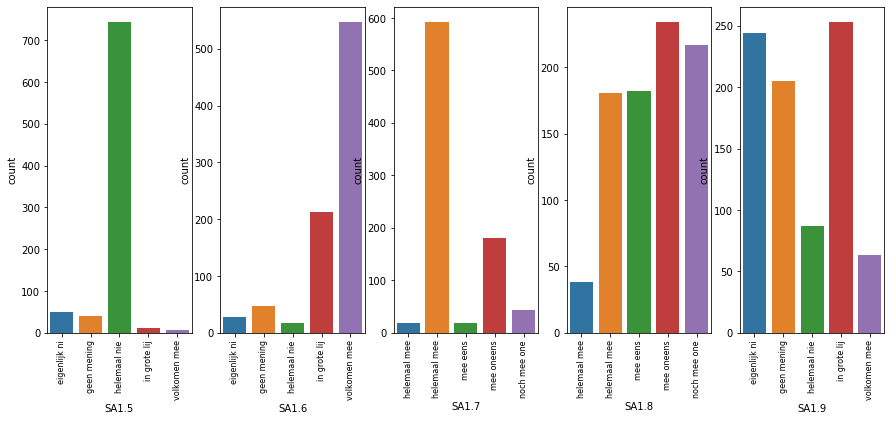

In [13]:
plot_count(sub_attr_new.iloc[:,10:15])

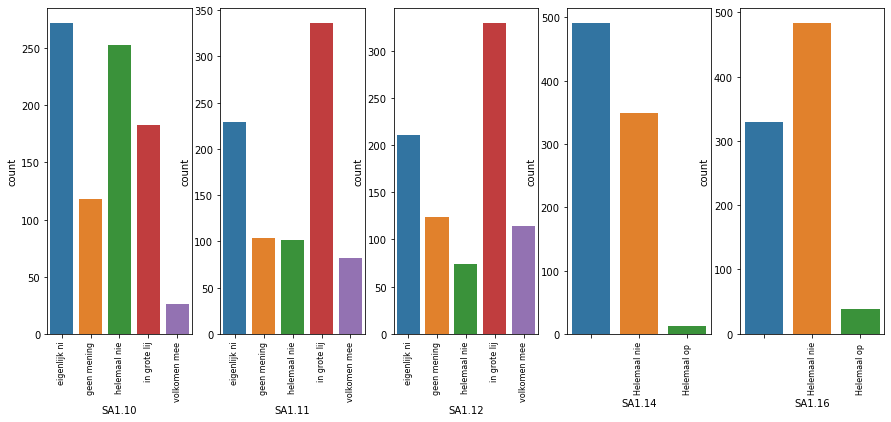

In [14]:
plot_count(sub_attr_new.iloc[:,15:20])

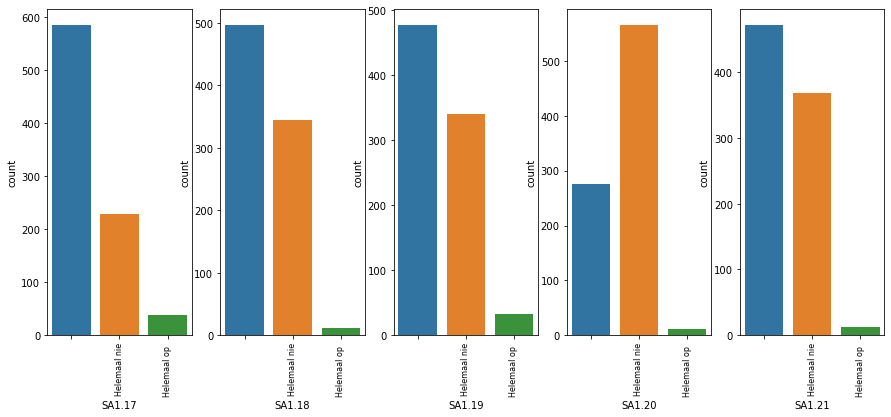

In [17]:
plot_count(sub_attr_new.iloc[:,20:25])

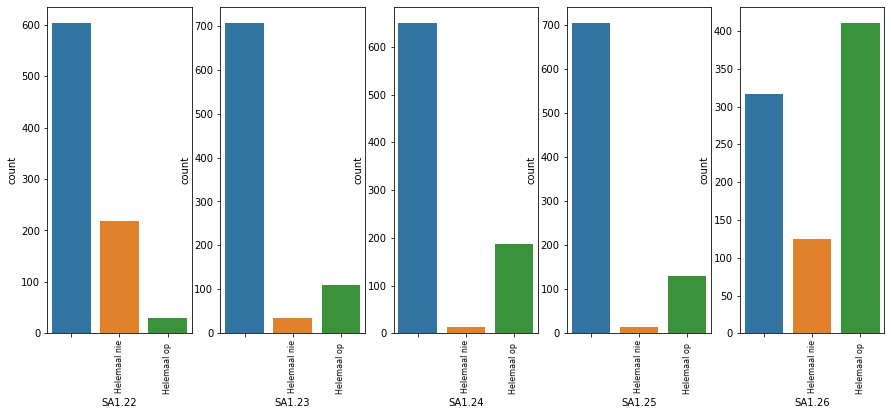

In [18]:
plot_count(sub_attr_new.iloc[:,25:30])

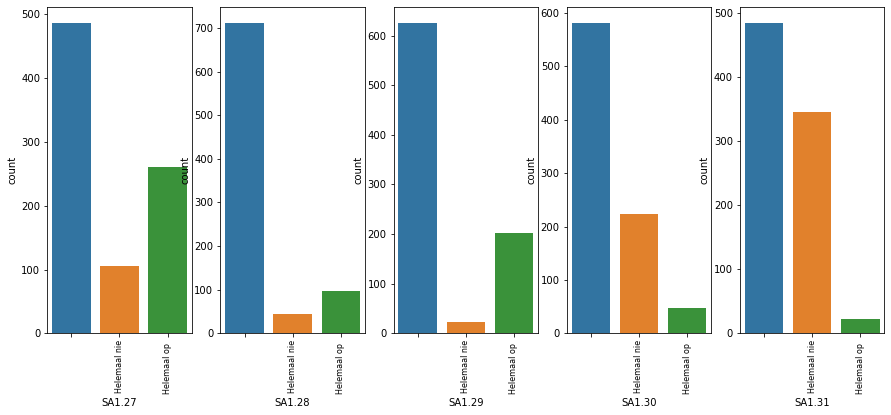

In [19]:
plot_count(sub_attr_new.iloc[:,30:35])

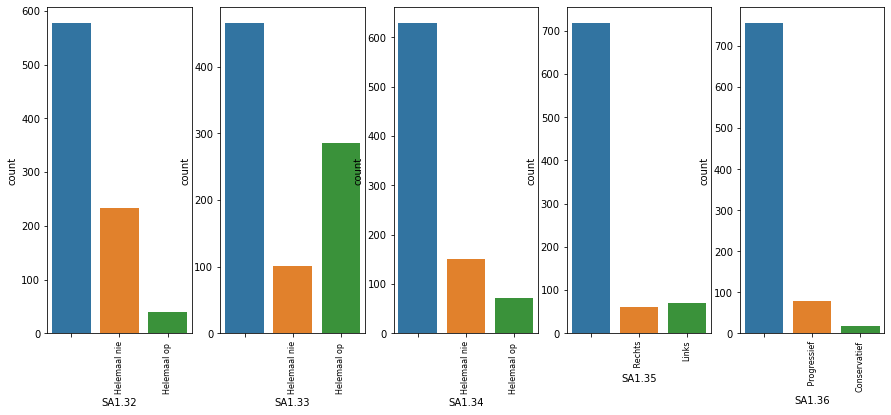

In [20]:
plot_count(sub_attr_new.iloc[:,35:40])

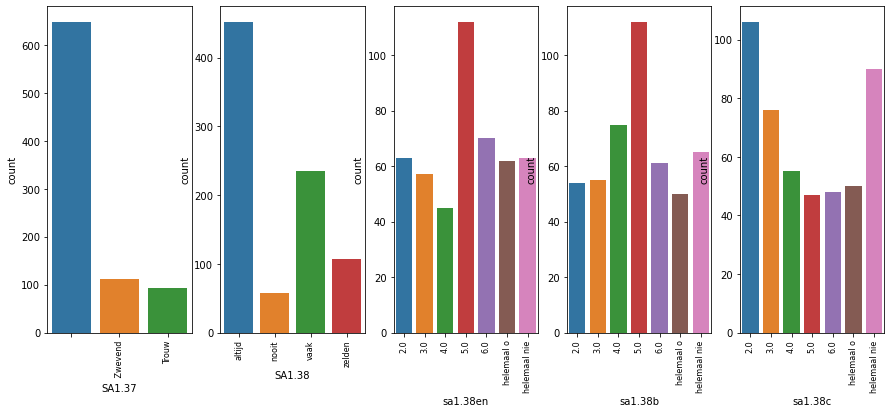

In [21]:
plot_count(sub_attr_new.iloc[:,40:45])

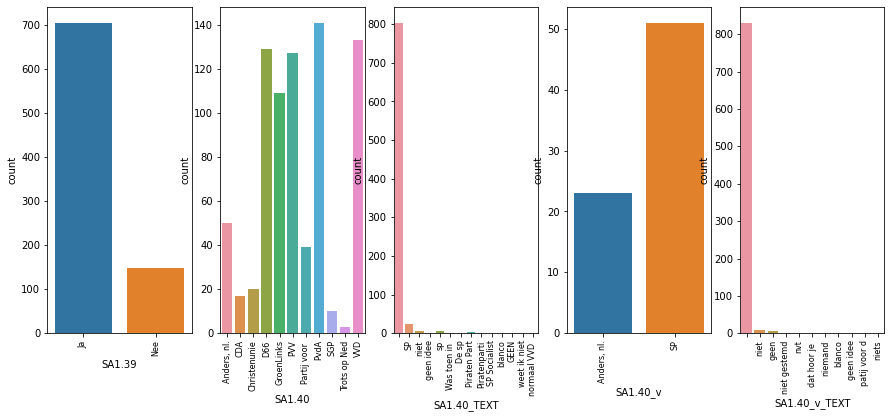

In [22]:
plot_count(sub_attr_new.iloc[:,45:50])

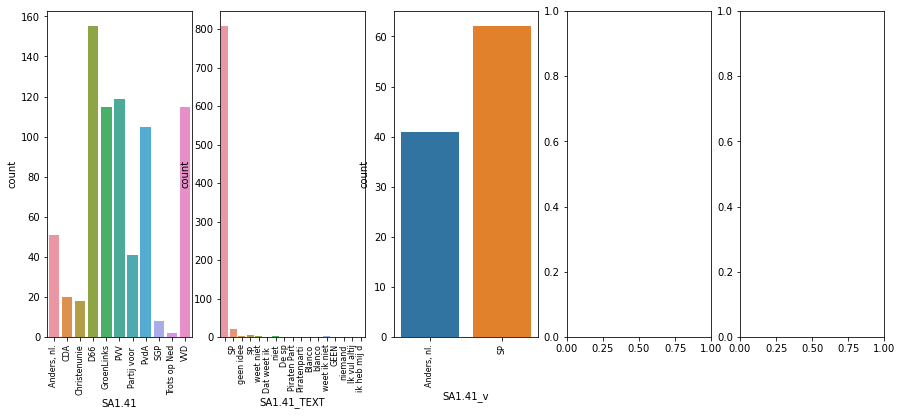

In [23]:
plot_count(sub_attr_new.iloc[:,50:55])

**4.2 explore meaningful relationships between the variables**     
Some variables have too many "NA". When we conduct chi-square independence test, I ignore those variables. Just check relations between 19 variables.  
We use chi-square independence test to explore relations between them, because all of them are categorial variables. We visualize the p values of chi-square independence test between each pair of variables. In order to explore the result easily, when p > =0.05, we change it to 1. So in the figure below, black block means there is relationship between the two variables. Bright block means that the two variables are independent to each other.   

From the plot, we can see that Anam1.4 (Are you left handed or right handed?) is independent to other variables, except SA1.10 (There are two types / people: strong and weak).  

For other varibles, they have relationships with other variables. 

In [25]:
#visualize p values of chi-square independence test 
def ch_calculate(df):
    factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values] 

    chi2, p_values =[], []

    for f in factors_paired:
        if f[0] != f[1]:
            #print(f[0],f[1])
            chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
            chi2.append(chitest[0])
            if chitest[1]>=0.05:
                p_values.append(1)    #easy to check p<0.05
            else:
                p_values.append(chitest[1])
            
            #print(f[0],f[1],p_values[-1])
        else:      # for same factor pair
            chi2.append(0)
            p_values.append(0)
            #print(f[0],f[1], p_values[-1])

    #chi2 = np.array(chi2).reshape((len(df.columns),len(df.columns))) # shape it as a matrix
    #chi2 = pd.DataFrame(chi2, index=df.columns.values, columns=df.columns.values) # then a df for convenience
    p_values_2 = np.array(p_values).reshape((len(df.columns),len(df.columns))) # shape it as a matrix
    p_values_2 = pd.DataFrame(p_values_2, index=df.columns.values, columns=df.columns.values) # then a df for convenience

    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(p_values_2, annot = True)
    plt.show()

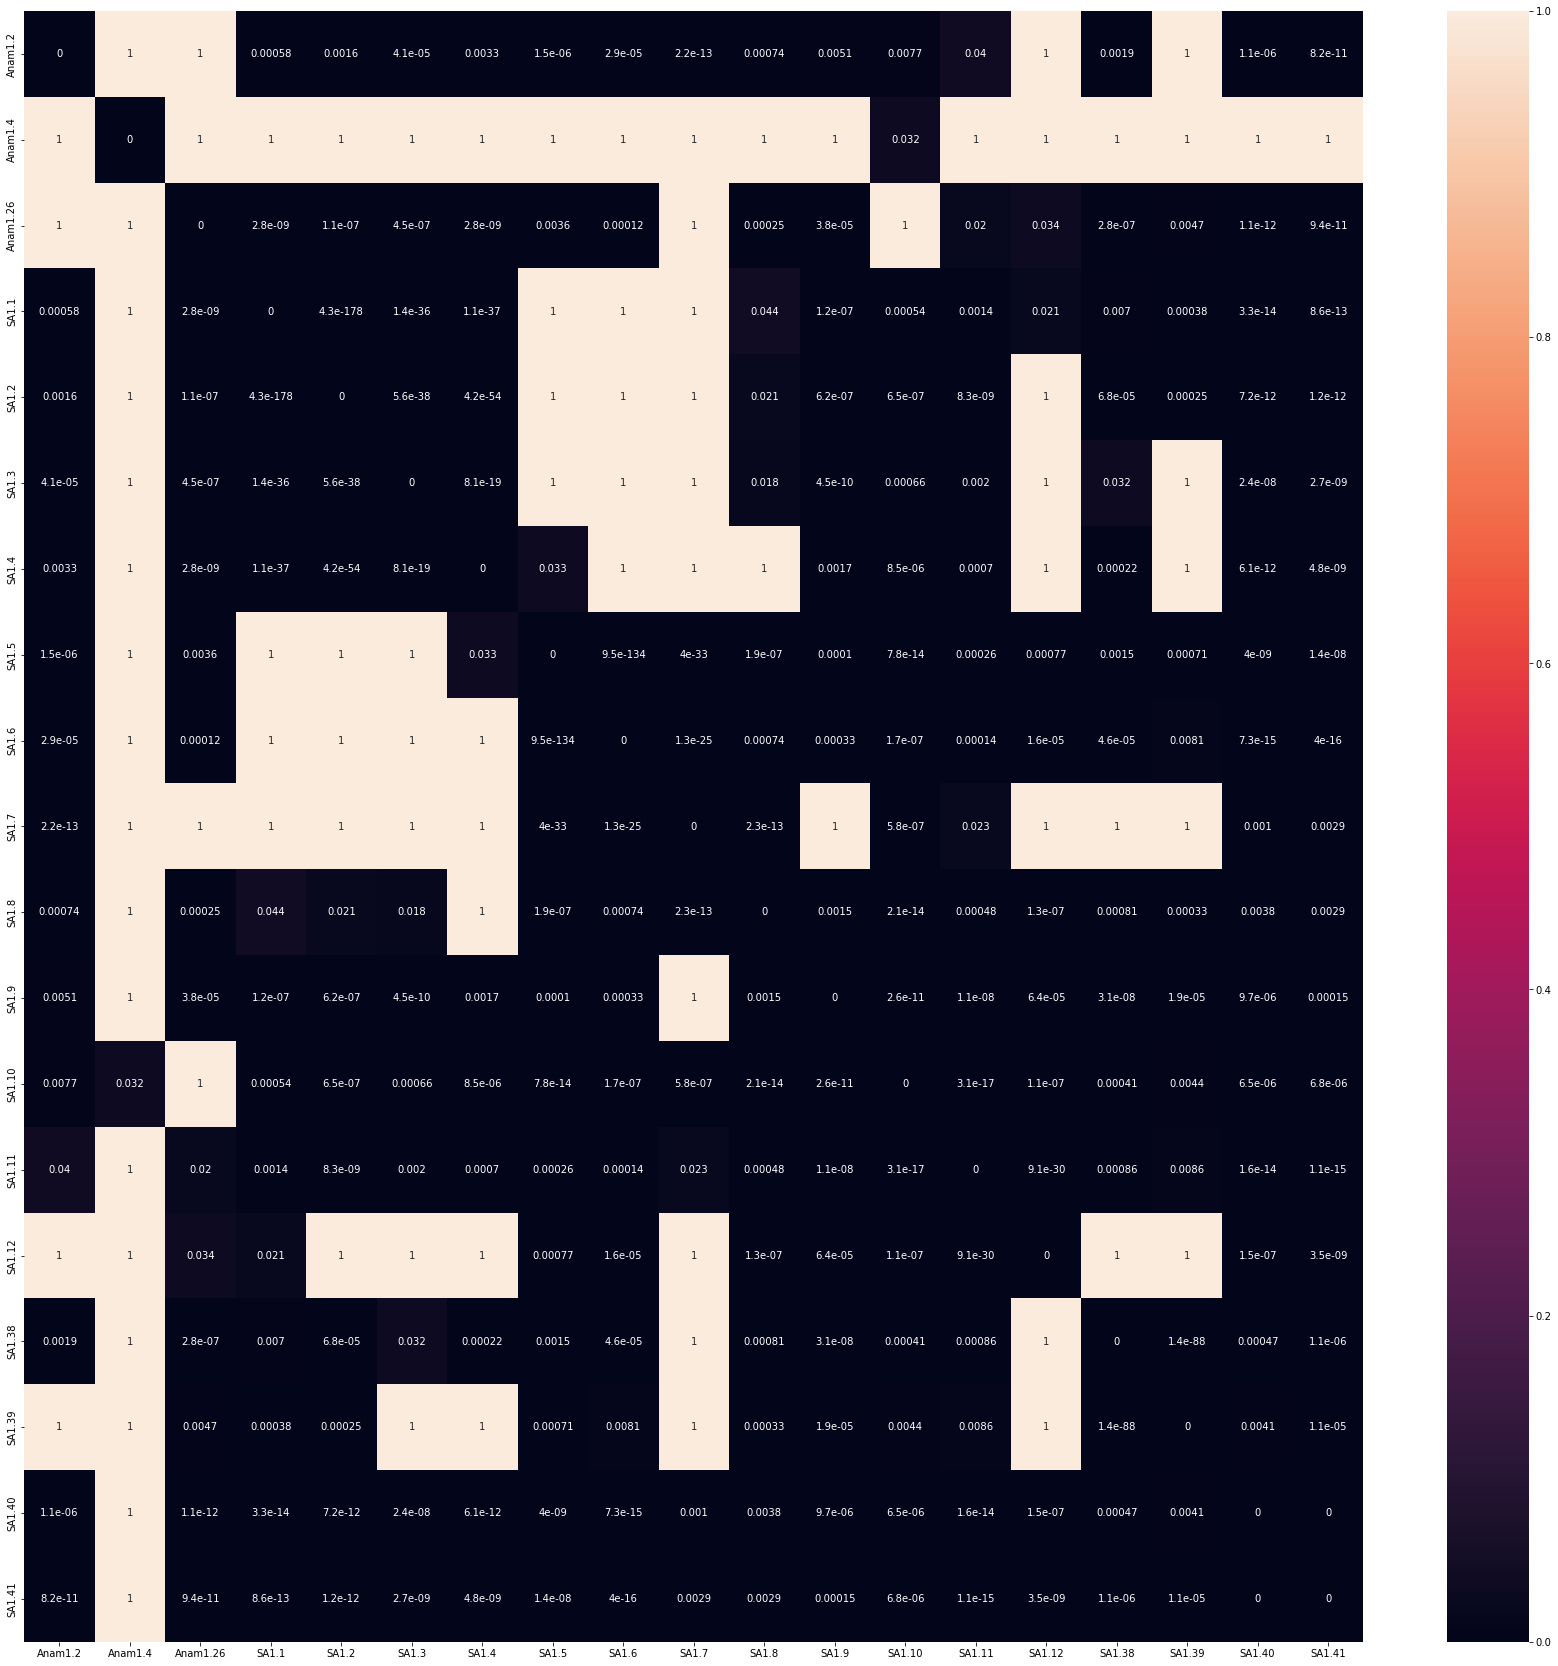

In [26]:
sub_attr_new_chi_2 = sub_attr_new.drop(columns = ["Anam1.8","SA1.14","SA1.17","SA1.18","SA1.19","SA1.21","SA1.22","SA1.23","SA1.24","SA1.25","SA1.27","SA1.28","SA1.29","SA1.30","SA1.31","SA1.32","SA1.33","SA1.34","SA1.35","SA1.36","SA1.37","SA1.40_TEXT","SA1.40_v","SA1.40_v_TEXT","SA1.41_TEXT","SA1.41_v","Anam1.8_v","anam1.8b","SA1.16","SA1.20","SA1.26","sa1.38en","sa1.38b","sa1.38c" ])
ch_calculate(sub_attr_new_chi_2)